In [12]:
import os.path

import numpy as np

from notebooks.analytics.utils import init_analysis, savefig, boxplot_metric

In [13]:
#EXP_NAME = "daeclust_2000_05-clusters" # multi clusters, tol: 2, all fixed same setup as fed_avg_08
#EXP_NAME = "daeclust_2000_06-clusters" # multi clusters, tol: 2, all fixed
EXP_NAME = "daeclust_2000_07-clusters" # multi clusters, tol: 2, all fixed
#EXP_NAME = "daeclust_09-clusters" # multi clusters, tol: 2, all fixed
df = init_analysis(EXP_NAME)

In [14]:
df.columns

Index(['Unnamed: 0', 'training_loss', 'epoch', 'validation_loss',
       'validation_acc', 'mlflow.user', 'mlflow.source.name',
       'mlflow.source.type', 'dataset', 'model_name', 'cluster_id', 'round_id',
       'trainer_id', 'test', 'balanced', 'partition_index', 'n_partitions',
       'lower_bound', 'higher_bound', 'n_samples', 'mlflow.runName'],
      dtype='object')

C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


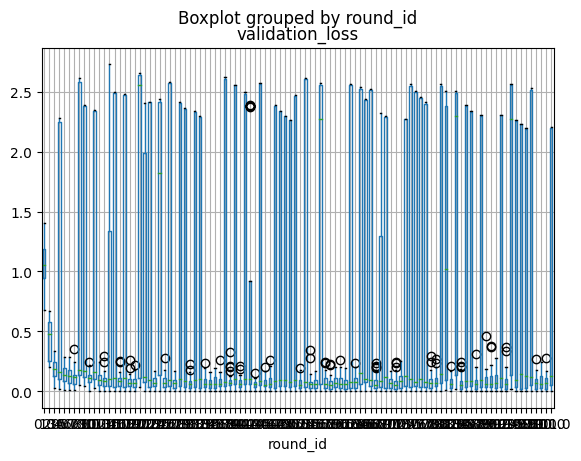

In [15]:
boxplot_metric(df, "validation_loss")

C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


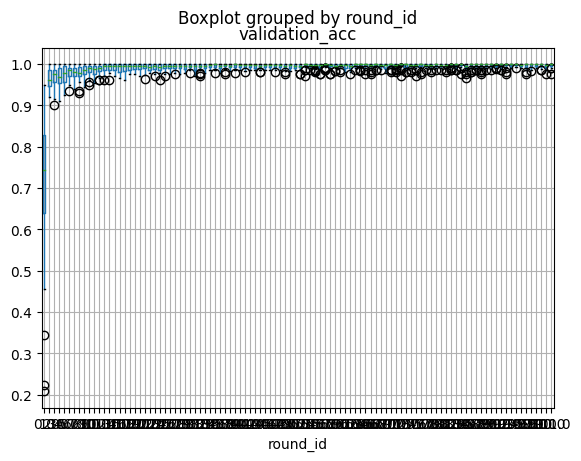

In [16]:
boxplot_metric(df, "validation_acc")

In [17]:
dataset_perf = df.loc[df.round_id < 32].groupby(["round_id","dataset"])
dataset_perf["validation_loss"].mean()

round_id  dataset
0.0       mnist      1.062769
1.0       mnist      0.339772
2.0       mnist      0.154304
3.0       mnist      1.154586
4.0       mnist      0.111448
5.0       mnist      0.096481
6.0       mnist      0.086759
7.0       mnist      1.394905
8.0       mnist      1.117764
9.0       mnist      0.076189
10.0      mnist      1.215755
11.0      mnist      0.066031
12.0      mnist      0.058658
13.0      mnist      0.897452
14.0      mnist      1.327918
15.0      mnist      0.057547
16.0      mnist      1.059396
17.0      mnist      0.048545
18.0      mnist      0.051529
19.0      mnist      1.603800
20.0      mnist      1.111865
21.0      mnist      1.093791
22.0      mnist      0.047883
23.0      mnist      1.270372
24.0      mnist      0.045458
25.0      mnist      1.206413
26.0      mnist      0.039824
27.0      mnist      1.117143
28.0      mnist      1.316154
29.0      mnist      0.040509
30.0      mnist      1.109452
31.0      mnist      1.069553
Name: validation_loss,

C:\Users\micdu\AppData\Local\Temp\ipykernel_17528\1895144522.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cluster_count_fig.show()


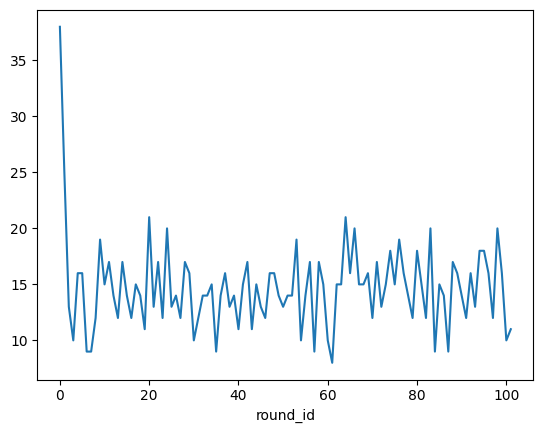

In [18]:
cluster_count_ax = df.groupby("round_id")["cluster_id"].nunique().plot()
cluster_count_fig = cluster_count_ax.get_figure()
savefig(cluster_count_fig, "cluster_count")
cluster_count_fig.show()

In [19]:
n_clusters = df.groupby("round_id")["cluster_id"].nunique()
loss = df.groupby("round_id")["validation_loss"].mean()

np.corrcoef(loss, n_clusters)

array([[ 1.        , -0.10821119],
       [-0.10821119,  1.        ]])

In [20]:
np.corrcoef(loss[1:], n_clusters[:len(n_clusters)-2])

array([[ 1.        , -0.05243893],
       [-0.05243893,  1.        ]])

In [24]:
EXP_NAME = "daeclust_2000_05-clusters-selection"
#EXP_NAME = "daeclust_2000_07-clusters-selection"
df = init_analysis(EXP_NAME)

C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


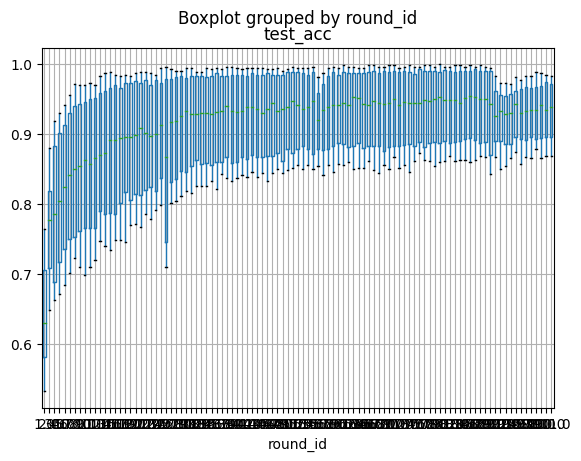

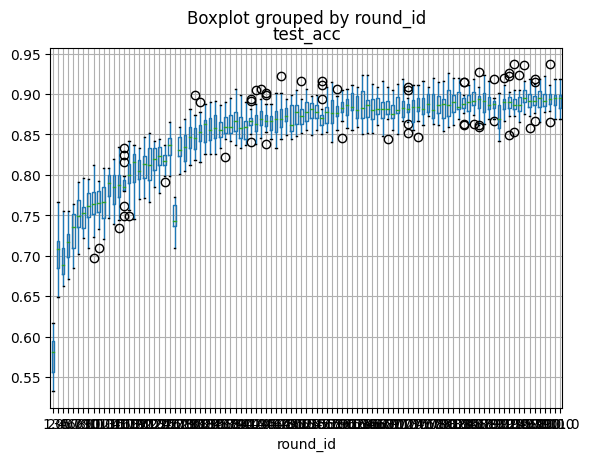

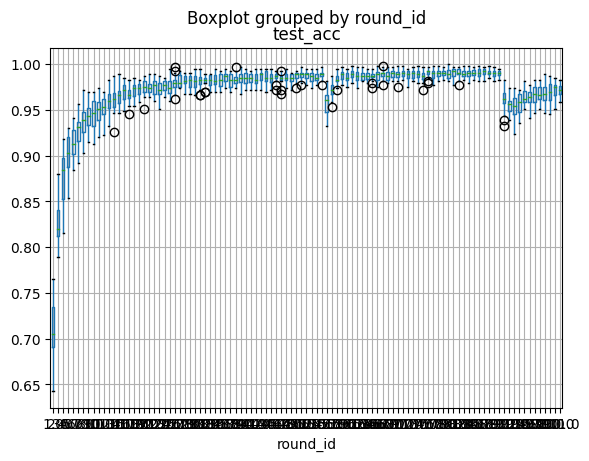

In [25]:
boxplot_metric(df, "test_acc")